In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
from src.visualization.vis_data import *
import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

Loading BokehJS ...

# Build Data

In [25]:
# start building dataset from scratch only perform this when new data files are added 
dataset = Dataset('Nakhon Si Thammarat')
dataset.build_all_data( build_fire=True, build_holiday = True)

save file ../data/nakhon_si_thammarat/42t.csv
save file ../data/nakhon_si_thammarat/m3.csv
save file ../data/nakhon_si_thammarat/o26.csv
Averaging data from 5 stations
Loading all hotspots data. This might take sometimes
before drop (1663223, 18)
after drop (1600293, 10)
Getting holiday for  thailand


# Vis Data

In [2]:
# init the data and load saved process data 
dataset = Dataset('Nakhon Si Thammarat')
dataset.load_()
# merge pollution data with other data except fire
dataset.feature_no_fire()

data no fire has shape (39536, 13)


Index(['PM2.5', 'PM10', 'O3', 'CO', 'NO2', 'SO2'], dtype='object')


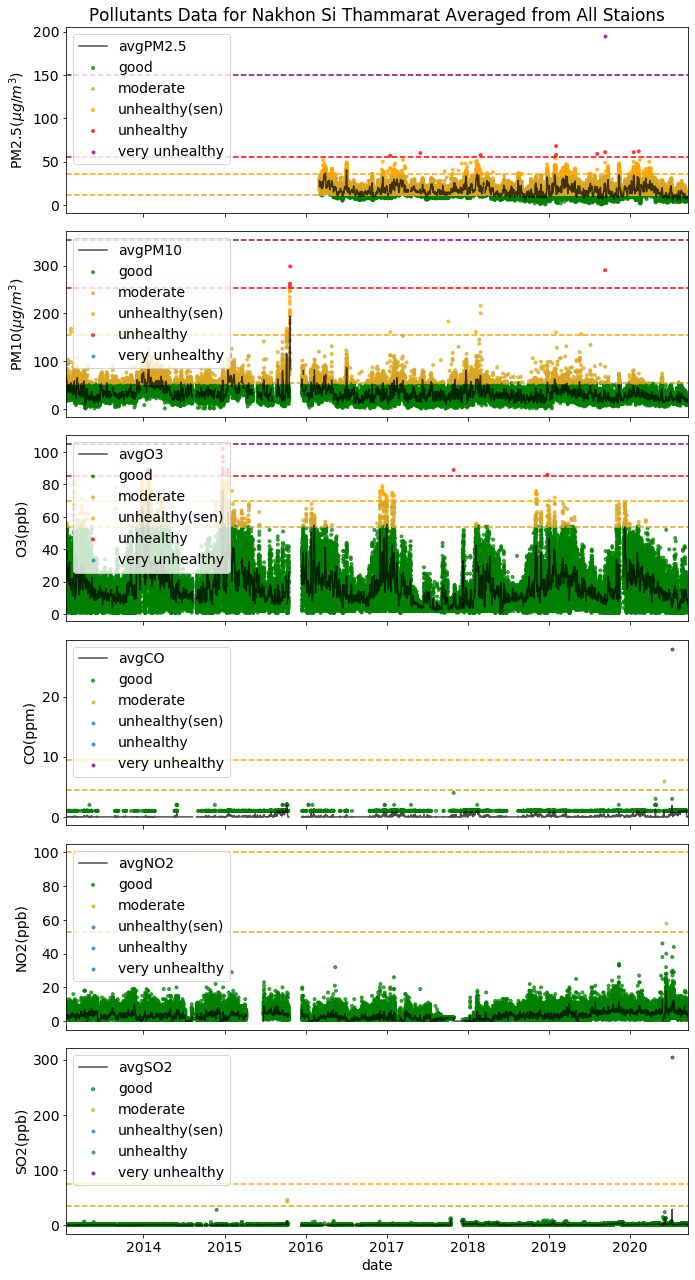

In [31]:
# plot the raw data
plot_all_pollutions(dataset.poll_df, city_name=dataset.city_name)

Actually, we are seeing some seasonal pattern in PM2.5, PM10 and O$_3$.

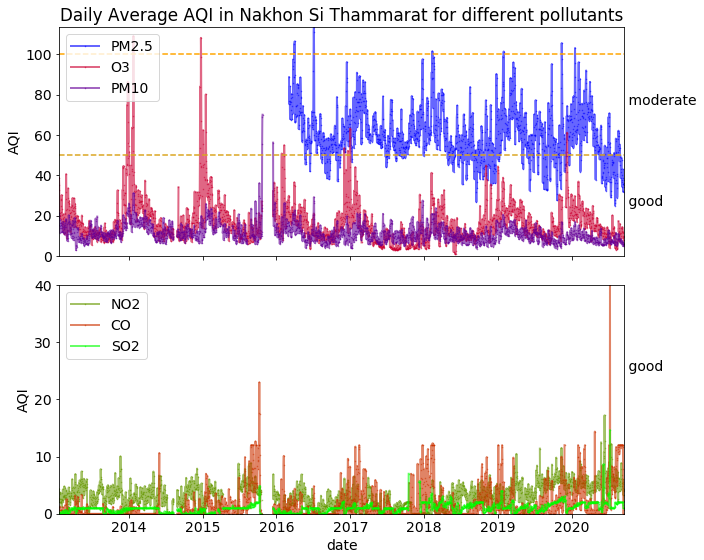

In [37]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

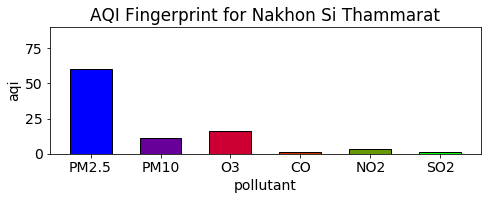

In [38]:
plot_chem_print(poll_to_aqi(dataset.poll_df.copy(), dataset.roll_dict).mean(axis=0), dataset.city_name, filename=dataset.report_folder + 'fingerprint.png')

In [40]:
dataset.poll_df['PM10'].dropna().head()

datetime
2013-01-19 00:00:00    68.0
2013-01-19 01:00:00    58.0
2013-01-19 02:00:00    60.0
2013-01-19 03:00:00    57.0
2013-01-19 04:00:00    46.0
Name: PM10, dtype: float64

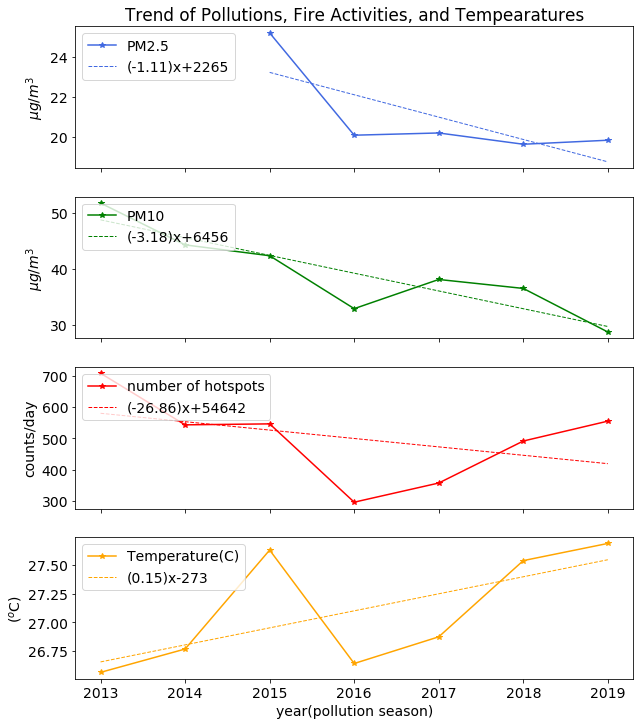

In [42]:
ax, year_avg = plot_yearly_ln(dataset, filename=dataset.report_folder + 'compare_ln_trends.png', min_year=2013)

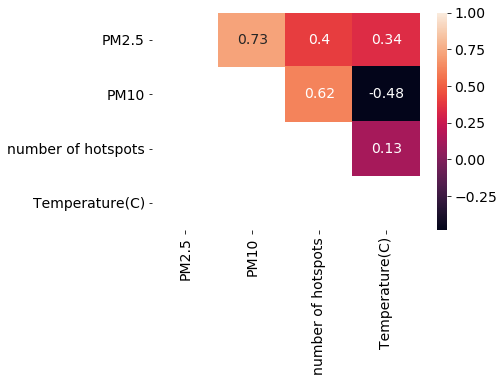

In [43]:
plot_corr(year_avg, figsize=(6,4))

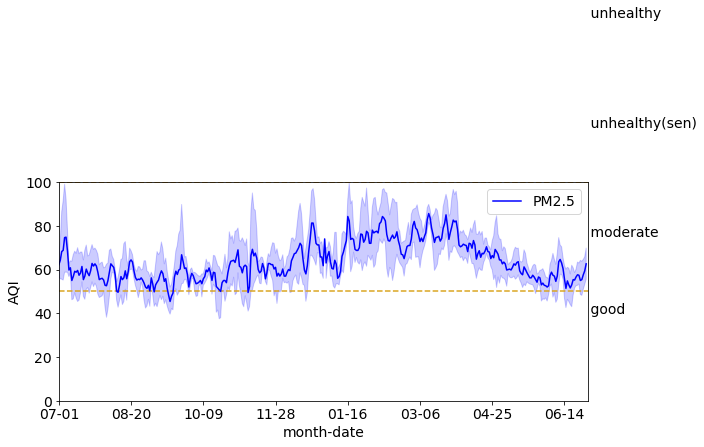

In [9]:
plot_season_aqi(dataset.poll_df.copy(), dataset.roll_dict, 'PM2.5', aqi_text=True)
plt.ylim([0, 100])
plt.savefig(dataset.report_folder + 'seasonal_pattern_PM25.png')

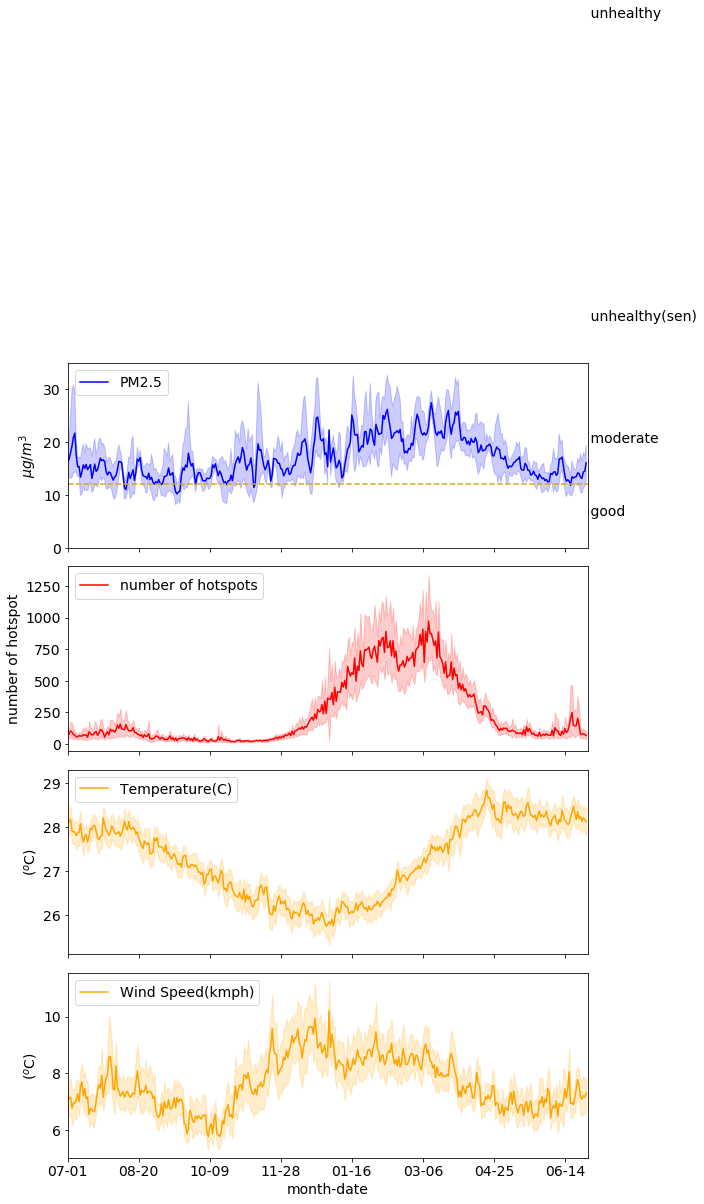

In [8]:
ax = compare_seson_avg(dataset, agg='mean')
ax[0].set_ylim([0,35])

plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

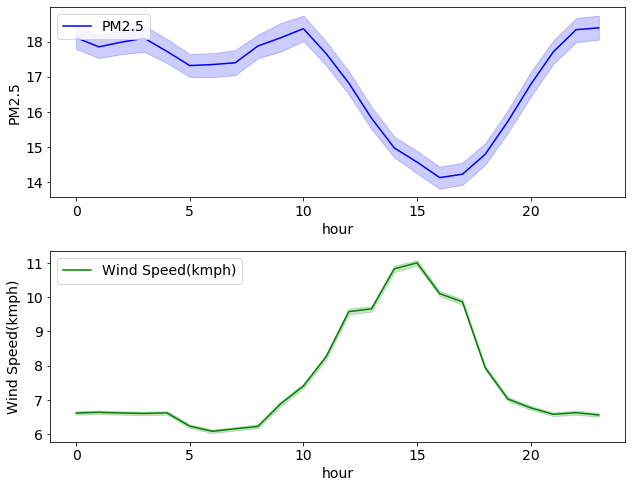

In [46]:
_, ax = plt.subplots(2, 1, figsize=(9, 7))
plot_hour_avg(dataset.poll_df.copy(), 'PM2.5', ax[0],  color='blue')
plot_hour_avg(dataset.wea.copy(), 'Wind Speed(kmph)', ax[1],  color='green')
plt.tight_layout()

# Train Model

## PM2.5

data no fire has shape (39266, 13)
=================optimize 1: find the best RF model=================
xtrn has shape (23212, 15)
{'n_estimators': 140, 'min_samples_split': 50, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True} 0.03291157839673725
val score after op_rf {'val_r2_score': 0.1919909665504964, 'val_mean_squared_error': 50.91957324914209, 'val_mean_absolute_error': 5.474219921660097}
test score after op_rf {'test_r2_score': 0.1982324271902085, 'test_mean_squared_error': 41.10197013551522, 'test_mean_absolute_error': 5.119802839158764}
=================optimize 2: remove unncessary columns=================
old cols length 15
drop is_weekend
use columns ['Temperature(C)', 'Humidity(%)', 'Wind Speed(kmph)', 'wind_E', 'wind_N', 'wind_S', 'wind_W', 'is_rain', 'is_holiday', 'day_of_week', 'time_of_day', 'fire_0_200', 'fire_200_450', 'fire_450_1000']
score after dropping columns {'r2_score': 0.1944056462736461, 'mean_squared_error': 50.76740358773

(<src.features.dataset.Dataset at 0x1af1def1908>,
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=32,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       n_estimators=180, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 {'rolling_win': 1,
  'cat_hour': False,
  'fill_missing': True,
  'group_hour': 3,
  'split_lists': [[0.6, 0.2, 0.2], [0.6, 0.2, 0.2], [0.8, 0.2]],
  'x_cols_org': ['Temperature(C)',
   'Humidity(%)',
   'Wind Speed(kmph)',
   'wind_E',
   'wind_N',
   'wind_S',
   'wind_W',
   'is_rain',
   'is_holiday',
   'day_of_week',
   'time_of_day',
   'fire_0_200',
   'fire_200_450',
   'fire_450_1000'],
  'x_cols': ['Temperature(C)',
   'Humidity(

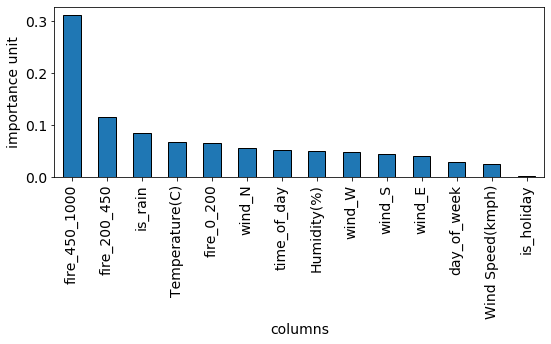

In [6]:
%%time 
train_city_s1(city='Nakhon Si Thammarat', pollutant= 'PM2.5', op_fire_twice=False, search_wind_damp=True)

In [7]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Nakhon Si Thammarat', pollutant='PM2.5')

data no fire has shape (39354, 13)
raw model performance {'test_r2_score': 0.24592234377442423, 'test_mean_squared_error': 38.60906614523281, 'test_mean_absolute_error': 4.986220794159069}
daily avg training error {'avg_trn_r2_score': 0.7137586008314185, 'avg_trn_mean_squared_error': 8.474823075899312, 'avg_trn_mean_absolute_error': 2.1601304672152177}
daily avg test error {'avg_test_r2_score': 0.32232564577960554, 'avg_test_mean_squared_error': 24.052891876813504, 'avg_test_mean_absolute_error': 3.959751672399534}


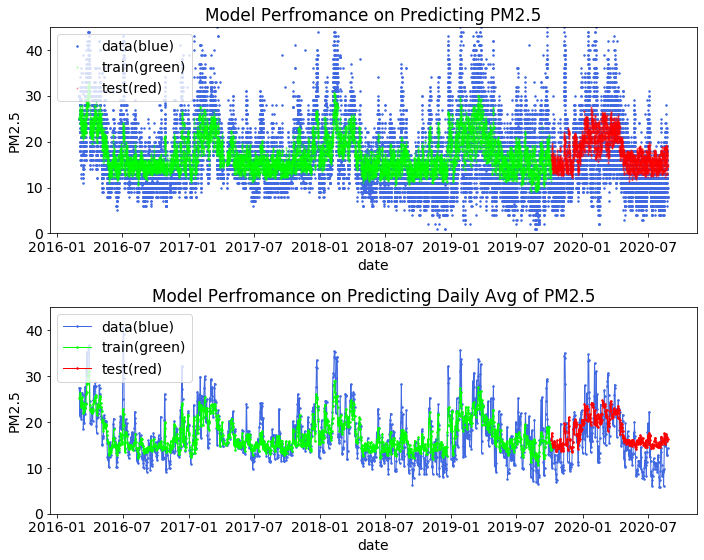

In [9]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.8, 0.2], ylim=[0, 45], to_save=False)


## PM10

data no fire has shape (63702, 13)
=================optimize 1: find the best RF model=================
xtrn has shape (37890, 15)
{'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True} 0.12579327507672616
val score after op_rf {'val_r2_score': 0.20744245571778386, 'val_mean_squared_error': 194.67276778092346, 'val_mean_absolute_error': 10.710438464750982}
test score after op_rf {'test_r2_score': -0.5008921565951658, 'test_mean_squared_error': 194.93602857506346, 'test_mean_absolute_error': 11.468289825800548}
=================optimize 2: remove unncessary columns=================
old cols length 15
drop is_weekend
drop wind_E
drop day_of_week
use columns ['Temperature(C)', 'Humidity(%)', 'Wind Speed(kmph)', 'wind_N', 'wind_S', 'wind_W', 'is_rain', 'is_holiday', 'time_of_day', 'fire_0_200', 'fire_200_450', 'fire_450_1000']
score after dropping columns {'r2_score': 0.20989978271474896, 'mean_squared_error': 19

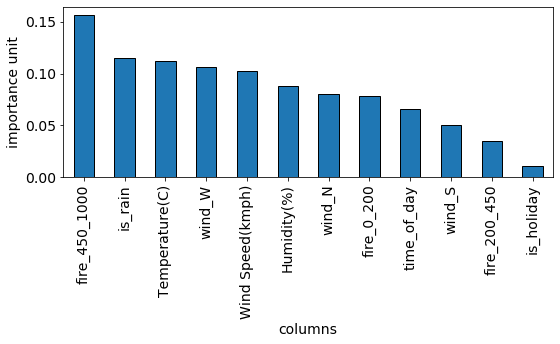

In [11]:
dataset, model, poll_meta = train_city_s1(city= 'Nakhon Si Thammarat', pollutant='PM10', op_fire_twice=False, search_wind_damp=True)

In [16]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Nakhon Si Thammarat', pollutant='PM10')

data no fire has shape (64186, 13)
raw model performance {'test_r2_score': -0.3105519141708424, 'test_mean_squared_error': 170.565583493367, 'test_mean_absolute_error': 10.533474167091933}
daily avg training error {'avg_trn_r2_score': 0.6818034681581372, 'avg_trn_mean_squared_error': 66.51186523468733, 'avg_trn_mean_absolute_error': 5.350419986419105}
daily avg test error {'avg_test_r2_score': -0.6274352224777835, 'avg_test_mean_squared_error': 111.42352273377928, 'avg_test_mean_absolute_error': 8.88572015648171}


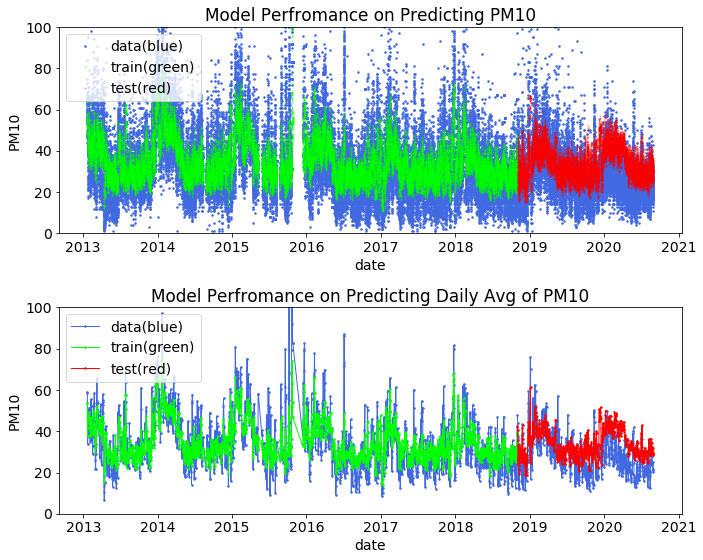

In [17]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.75, 0.25], ylim=[0, 100], to_save=False)


## O3

data no fire has shape (65041, 13)
=================optimize 1: find the best RF model=================
xtrn has shape (38664, 15)
{'n_estimators': 160, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False} 0.49229963422745493
val score after op_rf {'val_r2_score': 0.3218236786616061, 'val_mean_squared_error': 98.69897590610077, 'val_mean_absolute_error': 7.404126179979789}
test score after op_rf {'test_r2_score': 0.5775967662197903, 'test_mean_squared_error': 64.5890433338434, 'test_mean_absolute_error': 5.9462099078511885}
=================optimize 2: remove unncessary columns=================
old cols length 15
drop is_rain
drop wind_E
drop wind_W
drop wind_S
use columns ['Temperature(C)', 'Humidity(%)', 'Wind Speed(kmph)', 'wind_N', 'is_holiday', 'is_weekend', 'day_of_week', 'time_of_day', 'fire_0_200', 'fire_200_450', 'fire_450_1000']
score after dropping columns {'r2_score': 0.32575643434393997, 'mean_squared_error': 98.1266

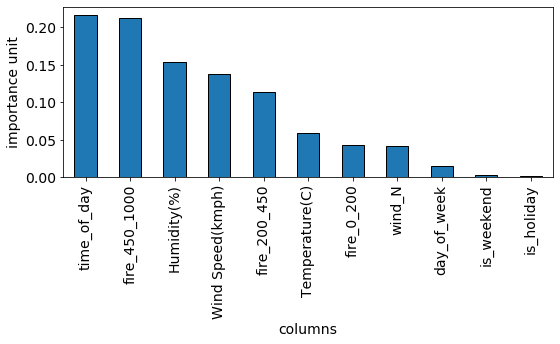

In [12]:
dataset, model, poll_meta = train_city_s1(city= 'Nakhon Si Thammarat', pollutant='O3', op_fire_twice=False, search_wind_damp=True)

In [18]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Nakhon Si Thammarat', pollutant='O3')

data no fire has shape (65100, 13)
raw model performance {'test_r2_score': 0.5255280834958755, 'test_mean_squared_error': 72.47379340336356, 'test_mean_absolute_error': 6.089820488373891}
daily avg training error {'avg_trn_r2_score': 0.7472002750554902, 'avg_trn_mean_squared_error': 25.37328235354361, 'avg_trn_mean_absolute_error': 3.6622238454051934}
daily avg test error {'avg_test_r2_score': 0.3502868593653514, 'avg_test_mean_squared_error': 38.248493849792474, 'avg_test_mean_absolute_error': 4.495770866823353}


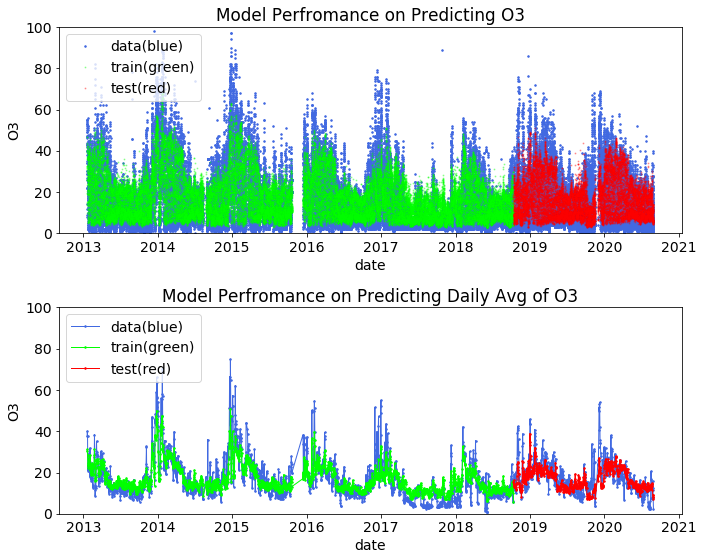

In [19]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.75, 0.25], ylim=[0, 100], to_save=False)
